In [1]:
import torch
import numpy as np
from torch.utils.data import DataLoader

from attrbench.evaluation.independent import sensitivity_n
from experiments.lib.util import get_ds_model, get_mask_range, get_methods
from experiments.test.util import imshow, attrshow, show_img_attrs

# Initialization and parameters

In [2]:
BATCH_SIZE = 4
DATASET = "MNIST"
MODEL = "CNN"
METHOD = "Gradient"
N_PERTURBATIONS = 16

device = "cuda" if torch.cuda.is_available() else "cpu"
dataset, model = get_ds_model(DATASET, MODEL)
methods = get_methods(model, aggregation_fn="avg", normalize=True, methods=[METHOD],
                      batch_size=BATCH_SIZE, sample_shape=dataset.sample_shape[-2:])
method = methods[METHOD]
model.to(device)
for param in model.parameters():
    param.requires_grad = False
model.eval()
mask_range = get_mask_range(DATASET)

# Run Sensitivity-n

In [10]:
batch, labels = next(iter(DataLoader(dataset, BATCH_SIZE, num_workers=4, shuffle=True)))
batch = batch.to(device)
labels = labels.to(device)
sens_n, debug_data = sensitivity_n(batch, labels, model, method,
                                    mask_range[1:], N_PERTURBATIONS, 0., debug_mode=True)

# Plot results

## Plot the original samples and their attributions

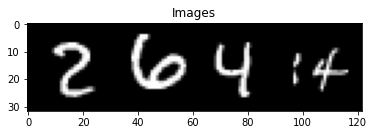

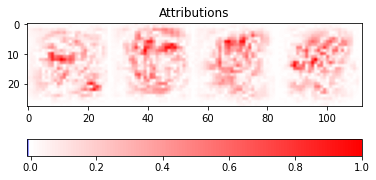

In [11]:
show_img_attrs(dataset.denormalize(batch), debug_data["attrs"])

## Plot perturbed samples and values for each perturbation step

n: 25


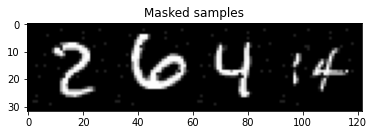

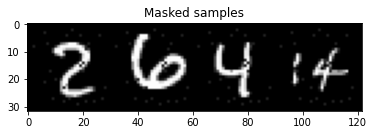

<class 'list'>
25 torch.Size([4, 25])
n: 50


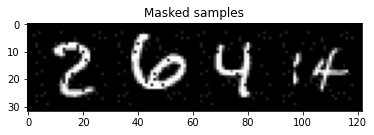

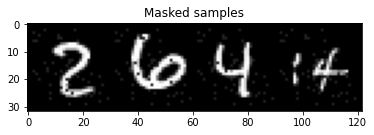

<class 'list'>
50 torch.Size([4, 50])
n: 75


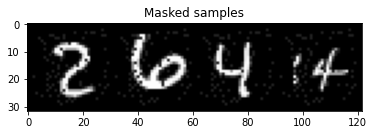

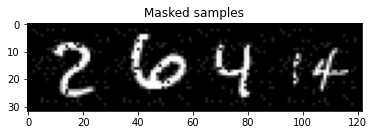

<class 'list'>
75 torch.Size([4, 75])
n: 100


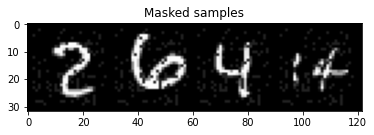

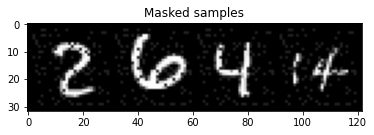

<class 'list'>
100 torch.Size([4, 100])
n: 125


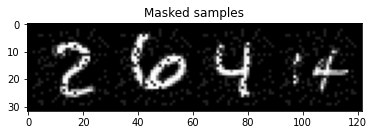

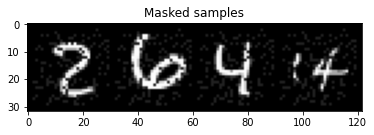

<class 'list'>
125 torch.Size([4, 125])
n: 150


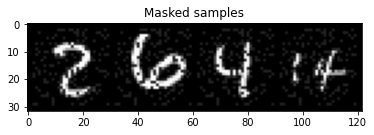

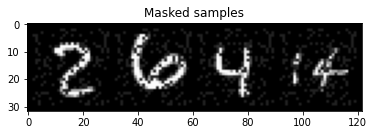

<class 'list'>
150 torch.Size([4, 150])
n: 175


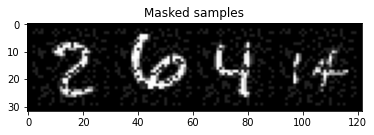

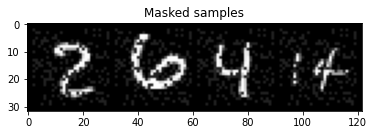

<class 'list'>
175 torch.Size([4, 175])
n: 200


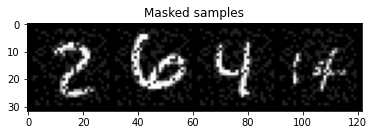

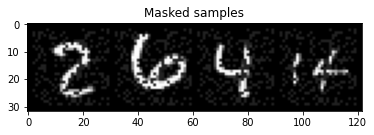

<class 'list'>
200 torch.Size([4, 200])
n: 225


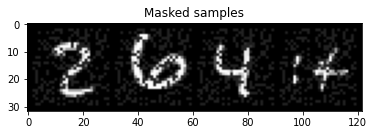

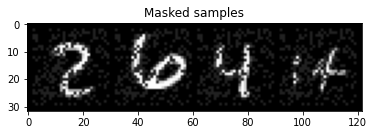

<class 'list'>
225 torch.Size([4, 225])
n: 250


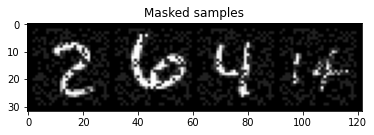

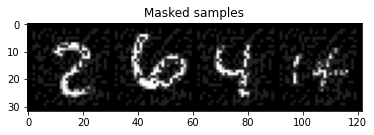

<class 'list'>
250 torch.Size([4, 250])
n: 275


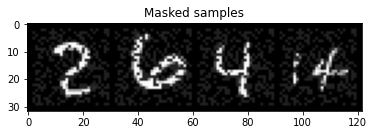

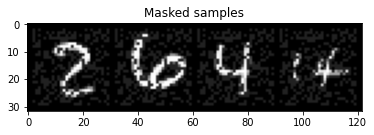

<class 'list'>
275 torch.Size([4, 275])
n: 300


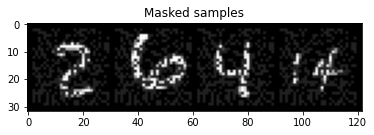

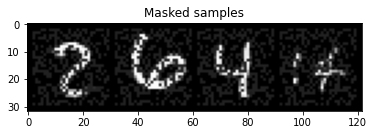

<class 'list'>
300 torch.Size([4, 300])
n: 325


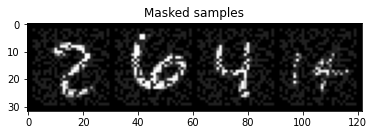

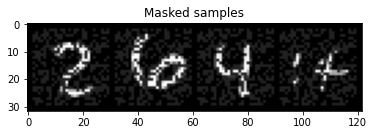

<class 'list'>
325 torch.Size([4, 325])
n: 350


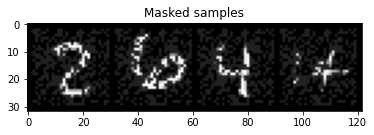

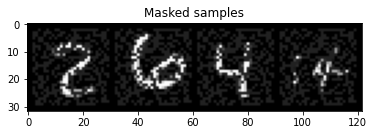

<class 'list'>
350 torch.Size([4, 350])
n: 375


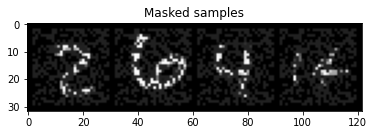

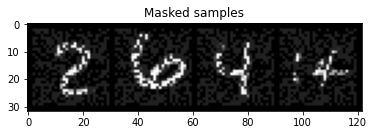

<class 'list'>
375 torch.Size([4, 375])


In [29]:
for n_idx, n_data in enumerate(debug_data["pert_data"]):
    print(f"n: {mask_range[n_idx+1]}")
    for pert_idx in range(2):
        masked = n_data["masked_samples"][pert_idx]
        imshow(dataset.denormalize(masked), title="Masked samples")